In [180]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [181]:
wk8 = pd.read_excel('WK2_Customers.xlsx')

In [182]:
wk8.head()

,CustomerID,Gender,Age,AnnualIncome,SpendingScore
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [183]:
wk8.dtypes

CustomerID        int64
Gender           object
Age               int64
AnnualIncome      int64
SpendingScore     int64
dtype: object

In [184]:
wk8.columns

Index(['CustomerID', 'Gender', 'Age', 'AnnualIncome', 'SpendingScore'], dtype='object')

In [185]:
wk8.shape

(200, 5)

In [186]:
wk8.isnull().sum()

CustomerID       0
Gender           0
Age              0
AnnualIncome     0
SpendingScore    0
dtype: int64

In [187]:
wk8.duplicated().sum()

0

### Exploratory Data Analysis

#### Central Tendency

In [188]:
wk8.describe()

,CustomerID,Age,AnnualIncome,SpendingScore
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [189]:
wk8['Age'].median()

36.0

In [190]:
wk8['AnnualIncome'].median()

61.5

In [191]:
wk8['SpendingScore'].median()

50.0

In [192]:
wk8['Age'].mode()

0    32
Name: Age, dtype: int64

In [193]:
wk8['AnnualIncome'].mode()

0    54
1    78
Name: AnnualIncome, dtype: int64

In [194]:
wk8['SpendingScore'].mode()

0    42
Name: SpendingScore, dtype: int64

#### Dispersion

In [195]:
wk8['AnnualIncome'].skew()

0.3218425498619055

In [196]:
wk8['SpendingScore'].skew()

-0.047220201374263374

In [197]:
wk8['AnnualIncome'].var()

689.8355778894478

In [198]:
wk8['SpendingScore'].var()

666.8542713567833

<Axes: ylabel='Density'>

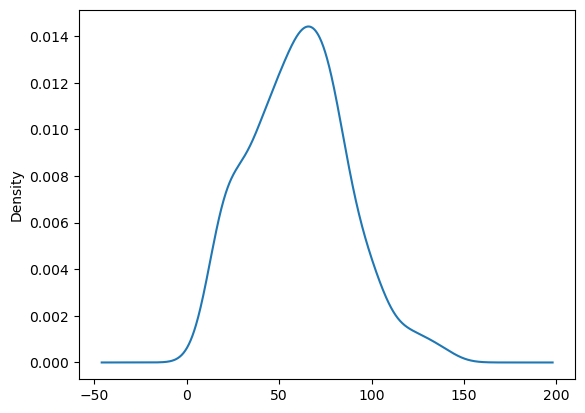

In [199]:
wk8['AnnualIncome'].plot(kind='kde')

<Axes: ylabel='Density'>

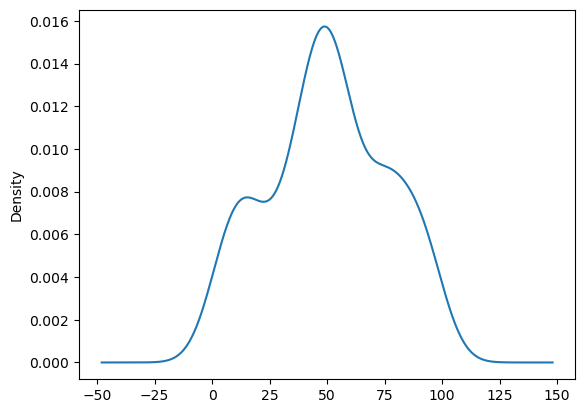

In [200]:
wk8['SpendingScore'].plot(kind='kde')

<Axes: >

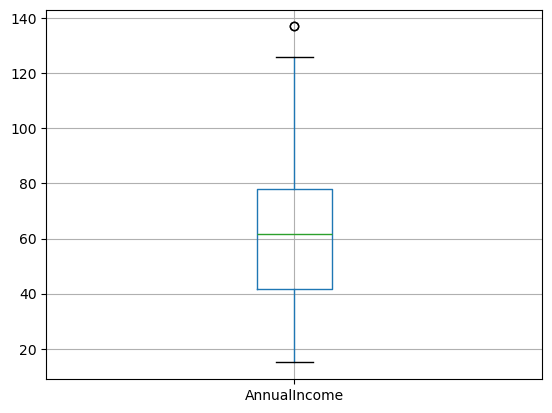

In [201]:
wk8.boxplot(column='AnnualIncome')

<Axes: >

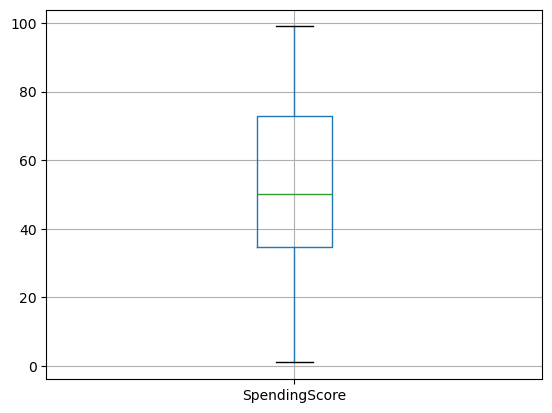

In [202]:
wk8.boxplot(column='SpendingScore')

#### Second Dataset

In [203]:
wk8_Location = pd.read_excel('WK7_Customer_Location.xlsx')


In [204]:
wk8_Location.head()

,CustomerID,ZipCode,City
0,1,77494,Katy
1,2,77494,Katy
2,3,77494,Katy
3,4,77494,Katy
4,5,77494,Katy


In [205]:
wk8_Location_=wk8_Location.copy()
wk8_Location_['City'] = wk8_Location['City'].iloc[::-1].values
wk8_Location_['ZipCode'] = wk8_Location['ZipCode'].iloc[::-1].values

In [206]:
wk8_Location_.head()

,CustomerID,ZipCode,City
0,1,77481,Thompsons
1,2,77481,Thompsons
2,3,77481,Thompsons
3,4,77481,Thompsons
4,5,77481,Thompsons


### Merging Data

In [207]:
wk8_merge = wk8.merge(wk8_Location_)

In [208]:
wk8_merge.head()

,CustomerID,Gender,Age,AnnualIncome,SpendingScore,ZipCode,City
0,1,Male,19,15,39,77481,Thompsons
1,2,Male,21,15,81,77481,Thompsons
2,3,Female,20,16,6,77481,Thompsons
3,4,Female,23,16,77,77481,Thompsons
4,5,Female,31,17,40,77481,Thompsons


In [209]:
wk8_merge['ZipCode'] = wk8_merge['ZipCode'].astype('object')
wk8_merge['CustomerID'] = wk8_merge['CustomerID'].astype('object')

In [210]:
wk8_merge.dtypes

CustomerID       object
Gender           object
Age               int64
AnnualIncome      int64
SpendingScore     int64
ZipCode          object
City             object
dtype: object

### Removing Outliers

In [211]:
Q1 = wk8_merge['AnnualIncome'].quantile(0.25)
Q3 = wk8_merge['AnnualIncome'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

In [212]:
df = wk8_merge[(wk8_merge['AnnualIncome'] >= lower_bound) & (wk8_merge['AnnualIncome'] <= upper_bound)]

<Axes: >

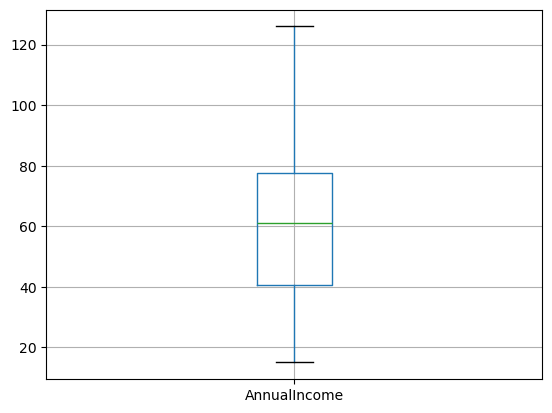

In [213]:
df.boxplot(column='AnnualIncome')

### Endoding Gender Variable

In [229]:
gender_mapping = {'Female': 0, 'Male': 1}
df.loc[:,'Gender_encoded'] = df['Gender'].map(gender_mapping)

### Creating Age Group Bins

In [230]:
bins = [18, 25, 35, 45, 55, float('inf')] 
labels = ['18-25', '26-35', '36-45', '46-55', '56+']
df.loc[:,'AgeGroup'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)

In [216]:
df.head()

,CustomerID,Gender,Age,AnnualIncome,SpendingScore,ZipCode,City,Gender_encoded,AgeGroup
0,1,Male,19,15,39,77481,Thompsons,1,18-25
1,2,Male,21,15,81,77481,Thompsons,1,18-25
2,3,Female,20,16,6,77481,Thompsons,0,18-25
3,4,Female,23,16,77,77481,Thompsons,0,18-25
4,5,Female,31,17,40,77481,Thompsons,0,26-35


### Clean Dataset Central Tendency

In [217]:
df.describe()

,Age,AnnualIncome,SpendingScore,Gender_encoded
count,198.000000,198.000000,198.000000,198.000000
mean,38.929293,59.787879,50.196970,0.434343
std,14.016852,25.237259,25.746846,0.496927
min,18.000000,15.000000,1.000000,0.000000
25%,28.250000,40.500000,35.000000,0.000000
50%,36.000000,61.000000,50.000000,0.000000
75%,49.000000,77.750000,72.750000,1.000000
max,70.000000,126.000000,99.000000,1.000000


In [218]:
df[['Age', 'AnnualIncome', 'SpendingScore']].mode()

,Age,AnnualIncome,SpendingScore
0,32.0,54,42.0
1,NaN,78,NaN


In [219]:
df[['Age', 'AnnualIncome', 'SpendingScore']].median()

Age              36.0
AnnualIncome     61.0
SpendingScore    50.0
dtype: float64

### Clean Dataset Dispersion

In [220]:
df[['Age', 'AnnualIncome', 'SpendingScore']].skew()

Age              0.470287
AnnualIncome     0.174267
SpendingScore   -0.048346
dtype: float64

In [221]:
df[['Age', 'AnnualIncome', 'SpendingScore']].kurtosis()

Age             -0.691981
AnnualIncome    -0.417599
SpendingScore   -0.803662
dtype: float64

### Export new Dataset

In [222]:
desired_directory = 'http://localhost:8888/lab/tree/TIM8550/WK8'
merged_data_file = desired_directory +'final_customer_data.csv'
df.to_csv(merged_data_file, index=False, mode='w')

### Visualizations for Infographic

In [223]:
mean_income_by_zip = df.groupby('ZipCode')['AnnualIncome'].mean().reset_index()
SpendingScore_by_City = df.groupby('City')['SpendingScore'].mean().reset_index()
mean_income_by_City = df.groupby('City')['AnnualIncome'].mean().reset_index()

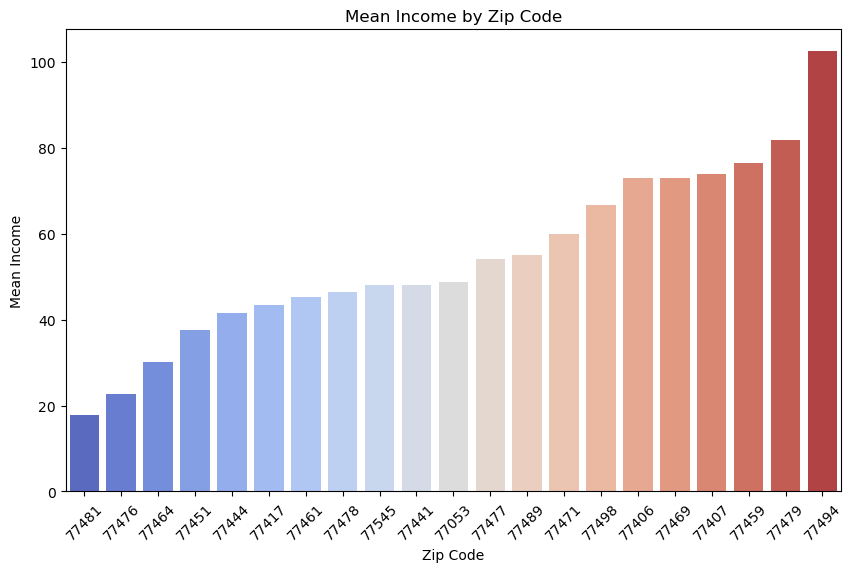

In [224]:
plt.figure(figsize=(10, 6))
sns.barplot(x='ZipCode', y='AnnualIncome', data=mean_income_by_zip, palette='coolwarm',
            order=mean_income_by_zip.sort_values('AnnualIncome', ascending=True)['ZipCode'])
plt.title('Mean Income by Zip Code')
plt.xlabel('Zip Code')
plt.ylabel('Mean Income')
plt.xticks(rotation=45)
plt.show()

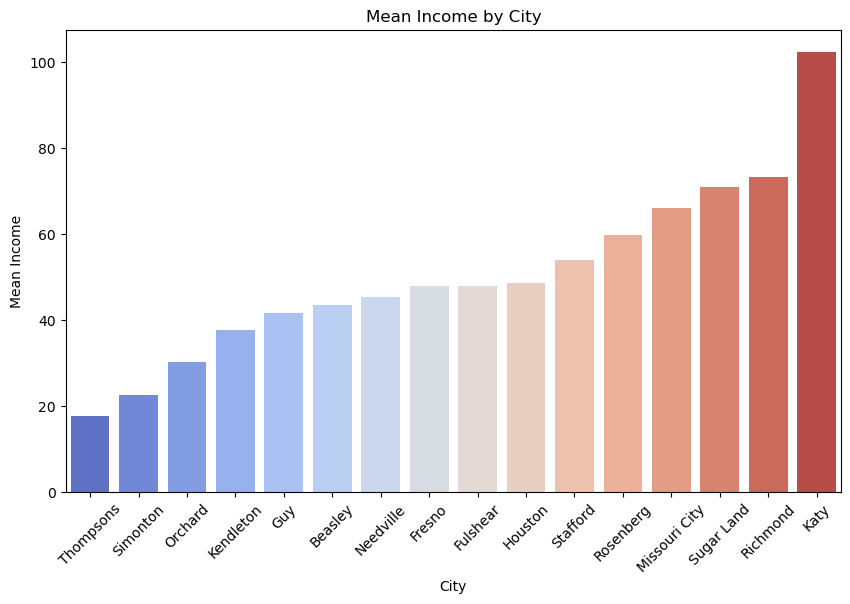

In [225]:
plt.figure(figsize=(10, 6))
sns.barplot(x='City', y='AnnualIncome', data=mean_income_by_City, palette='coolwarm',
            order=mean_income_by_City.sort_values('AnnualIncome', ascending=True)['City'])
plt.title('Mean Income by City')
plt.xlabel('City')
plt.ylabel('Mean Income')
plt.xticks(rotation=45)
plt.show()

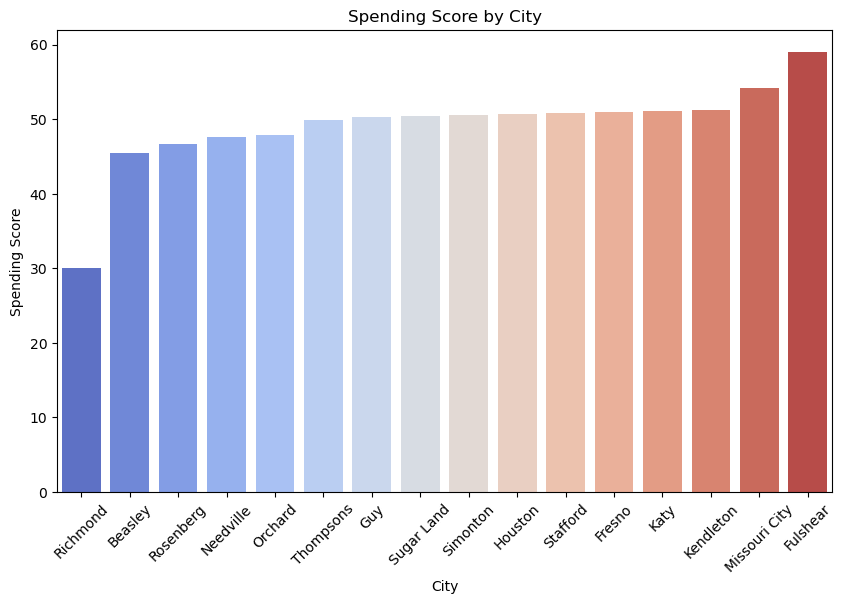

In [226]:
plt.figure(figsize=(10, 6))
sns.barplot(x='City', y='SpendingScore', data=SpendingScore_by_City, palette='coolwarm',
            order=SpendingScore_by_City.sort_values('SpendingScore', ascending=True)['City'])
plt.title('Spending Score by City')
plt.xlabel('City')
plt.ylabel('Spending Score')
plt.xticks(rotation=45)
plt.show()

C:\Users\fjrv2\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\fjrv2\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


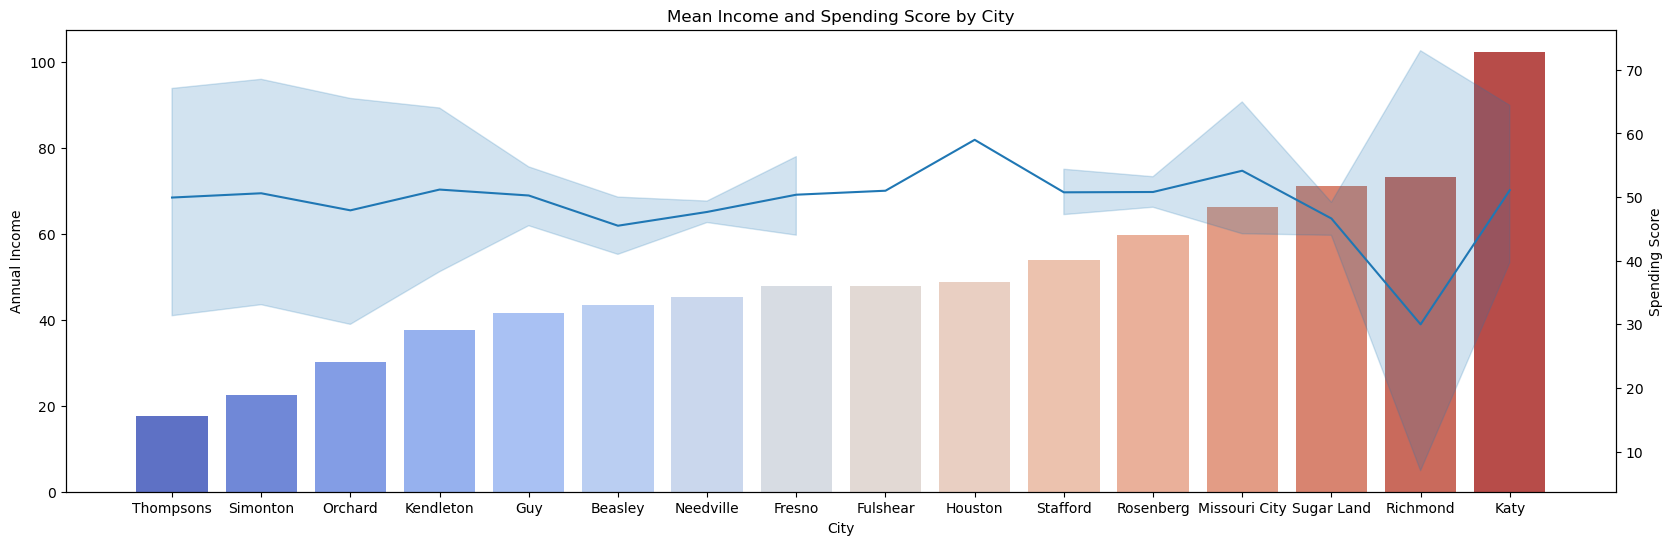

In [227]:
plt.figure(figsize=(20, 6))
ax1 = plt.ticklabel_format(style = 'plain')
ax1 = sns.barplot(x='City', y='AnnualIncome', data=mean_income_by_City, palette='coolwarm',
            order=mean_income_by_City.sort_values('AnnualIncome', ascending=True)['City'])

ax2 = ax1.twinx()
ax2 = sns.lineplot(data = df, x='City', y = 'SpendingScore')

plt.title('Mean Income and Spending Score by City')
ax1.set(xlabel= 'City', ylabel = 'Annual Income')
ax2.set(ylabel = 'Spending Score')

plt.show()

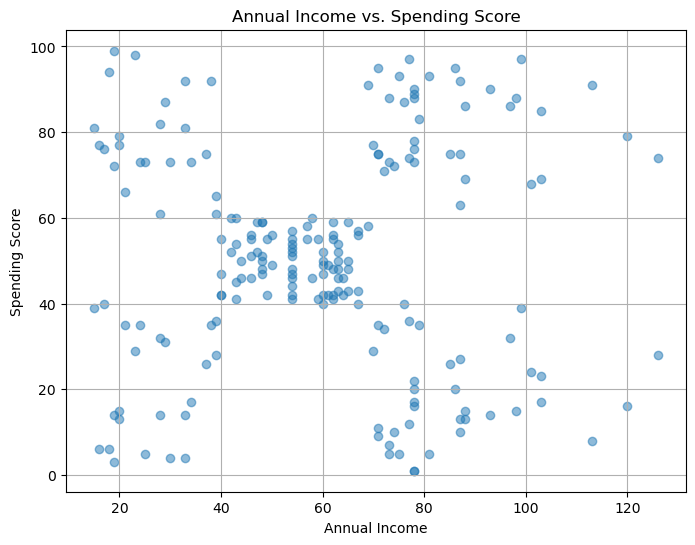

In [228]:
plt.figure(figsize=(8, 6))
plt.scatter(df['AnnualIncome'], df['SpendingScore'], alpha=0.5)
plt.title('Annual Income vs. Spending Score')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.grid(True)
plt.show()